## getting started

In [2]:
# variables
# : containers to store values

x = "Columbia"
print(x)
print(type(x))

# x = 5
# print(x)
# print(type(x))


Columbia
<class 'str'>


In [3]:
# lists
# : container to store multiple values 

x = ["apple", "orange", "banana"]
print(x)

# get length of list
print(len(x))

# get an element of list 
print(x[2])

['apple', 'orange', 'banana']
3
banana


In [4]:
# for loops
# : iterate over elements in a list 

thislist = [5,10,15]

for x in thislist:

  y = x + 10
  print(y)

15
20
25


In [5]:
# functions
# : blocks of code that runs when called

def add_10(x):

  # code to implement
  y = x + 10
  z = y / 2

  # return result
  return z 

# run function here
add_10(5)


7.5

## useful libraries
Libraries are useful functions that have been written by others so that you do not need to write the code from scratch

In [7]:
# import libraries

import numpy as np 
import scipy.stats as sp 
import matplotlib.pyplot as plt

In [8]:
# sample from a normal distribution

mean_ = 0
sdev_ = 1

n_samples = 10
s = np.random.normal(loc = mean_, 
                     scale = sdev_, 
                     size=n_samples)
print(s)

[-1.19798536 -1.37177413  1.28186999  0.23821939  0.80484547 -0.61094794
  0.31431567 -0.23184327 -0.27486756  0.62242636]


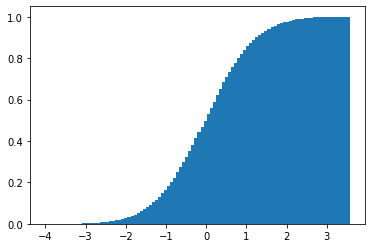

In [9]:
# plot the cdf of a normal distribution

mean_, sdev_ = 0, 1
n_samples = 10000
s = np.random.normal(loc = mean_, 
                     scale = sdev_, 
                     size=n_samples)

_ = plt.hist(s, bins=100, cumulative=True, density=True)

In [10]:
# inverse cdf function

# borrowers defaults with 5 percent probability
# borrower's income is drawn from N(0,1) distribution.
# default if income less than x 
# what is x? 

p = 0.05
x = sp.norm.ppf(p, 0, 1)
print(x)


-1.6448536269514729


## an example

an investor lends 10 borrowers 1 dollar each.

Each borrower's income is drawn from iid N(0,1).

Borrower defaults if income less than -1.65.

If don't default, pay investor 1 dollars.

If default, pay investor 0.

In [11]:
# parameters of the problem

n_borrowers = 10
mean_income = 0
sdev_income = 1
threshold = -1.65


In [12]:
# assume the following realization of income

income = np.random.normal(loc=mean_income, 
                          scale=sdev_income, 
                          size=n_borrowers)
print(income)


[ 0.2220027   0.52357055  0.91622495 -0.70081779 -2.47160784 -1.71148782
 -0.82486301 -0.7175521   0.23854202 -0.30169297]


In [13]:
# which borrower defaults?

print(income < threshold)

loan_payoff = (income < threshold) * 0 + (income >= threshold) * 1
print(loan_payoff)

[False False False False  True  True False False False False]
[1 1 1 1 0 0 1 1 1 1]


In [14]:
# what is the investor's total payoff?

total_payoff = np.sum(loan_payoff)
print(total_payoff)

8


now, suppose there are two investors. 

investor A funds 6 dollars, investor B funds 4 dollars.

the investors agree to a 60:40 split of the loan payoffs.

investor A is senior, so she gets paid first.

investor B then gets paid the remainder.

In [15]:
# how much does investor A get in return?

a_payoff = min(.6 * 10, total_payoff)
print(a_payoff)

6.0


In [16]:
# how much does investor B get in return?

b_payoff = min(.4 * 10, total_payoff - a_payoff)
print(b_payoff)

2.0


## putting everything together
this is an example for computing the payoffs to investor for one simulation

In [38]:
rho_list = [0, 0.5, 1] # you can try other values of rho

# parameters (update using information given in problem set)
n_borrowers = 10
payoff_default = 0.5
payoff_nodefault = 1
threshold = -1.65

# draw of income shocks (remember: you'll have to draw new values of s and eps for each simulation)
s = np.random.normal(0,1,size=1) # common s for all borrowers
eps = np.random.normal(0,1,size=n_borrowers) # each borrower has their own eps

for rho in rho_list:

  # compute the borrower's income
  x = np.sqrt(rho) * s + np.sqrt(1-rho) * eps

  # which borrower defaults?
  loan_payoff = (x < threshold) * payoff_default + (x >= threshold) * payoff_nodefault

  # total pool 
  total_payoff = np.sum(loan_payoff)

  # how much does each investor receive from total_payoff?
  senior_payoff = 0.5 * total_payoff # this is a placeholder - input the correct code here
  mezz_payoff = 0.3 * total_payoff # this is a placeholder - input the correct code here
  junior_payoff = 0.2 * total_payoff # this is a placeholder - input the correct code here

  print('total: {}, senior: {}, mezz: {}, junior: {}'.format(total_payoff, senior_payoff, mezz_payoff, junior_payoff))

# next steps
# repeat this for 100 simulations and compute the average payoff to each investor
# is it possible to generate the income for all simulations in one step? 
# hint: specify the "size" parameter in np.random.normal as a matrix

total: 9.5, senior: 4.75, mezz: 2.85, junior: 1.9000000000000001
total: 10.0, senior: 5.0, mezz: 3.0, junior: 2.0
total: 10.0, senior: 5.0, mezz: 3.0, junior: 2.0


In [68]:
rho_list = []

for i in range(100):
    rho_list.append(round(i * (1 / 100), 2))
rho_list

# parameters (update using information given in problem set)
n_borrowers = 10
payoff_default = 0.5
payoff_nodefault = 1
threshold = -1.65

s = np.random.normal(0,1,size=1) # common s for all borrowers
eps = np.random.normal(0,1,size=(100, n_borrowers)) # each borrower has their own eps

simulation_count = 0
senior_payoff_list = []
mezz_payoff_list = []
junior_payoff_list = []

for i in range(100):
    rho = rho_list[i]
    
#     print('\nSIMULATION #{}'.format(simulation_count))
    simulation_count += 1

    # compute the borrower's income
    x = np.sqrt(rho) * s + np.sqrt(1-rho) * eps[i]

    # which borrower defaults?
    loan_payoff = (x < threshold) * payoff_default + (x >= threshold) * payoff_nodefault

    # total pool 
    total_payoff = np.sum(loan_payoff)

    # how much does each investor receive from total_payoff?
    senior_payoff = 0.64 * total_payoff # this is a placeholder - input the correct code here
    mezz_payoff = 0.24 * total_payoff # this is a placeholder - input the correct code here
    junior_payoff = 0.12 * total_payoff # this is a placeholder - input the correct code here
    
    senior_payoff_list.append(senior_payoff)
    mezz_payoff_list.append(mezz_payoff)
    junior_payoff_list.append(junior_payoff)
    
print('Average payoff for senior: {}'.format(np.mean(senior_payoff_list)))
print('Average payoff for mezz: {}'.format(np.mean(mezz_payoff_list)))
print('Average payoff for junior: {}'.format(np.mean(junior_payoff_list)))


Average payoff for senior: 6.2303999999999995
Average payoff for mezz: 2.3364
Average payoff for junior: 1.1682


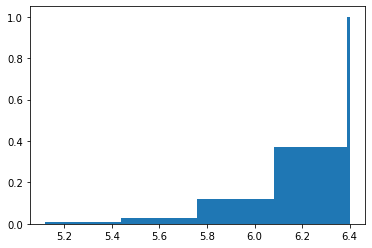

In [69]:
y_values = senior_payoff_list
_ = plt.hist(y_values, bins=100, cumulative=True, density=True)

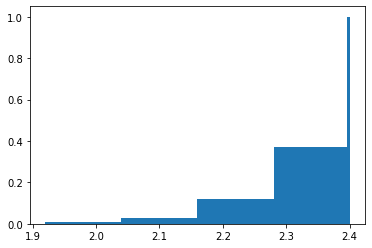

In [70]:
y_values = mezz_payoff_list
_ = plt.hist(y_values, bins=100, cumulative=True, density=True)

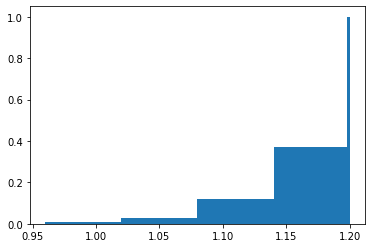

In [71]:
y_values = junior_payoff_list
_ = plt.hist(y_values, bins=100, cumulative=True, density=True)